<a href="https://colab.research.google.com/github/tcarlon94/Ultimate_Inc_study/blob/main/Ultimate_case_predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultimate Case Study - Predictive Modeling
# Predict Rider Retention

## Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_otherwise_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE

● weekday_pct: the percent of the user’s trips occurring during a weekday

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Load & Explore data

In [2]:
# Load file
file_name = 'ultimate_data_challenge.json'
df = pd.read_json(file_name)

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Looks like there are some null values in average rating for both driver and passenger and phone. We will take care of these in data cleaning

In [5]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Ratings are around 4.6-4.7 out of 5 for drivers and drivers. We can use the mean for this to impute the data.

In [6]:
df.dtypes

,0
city,object
trips_in_first_30_days,int64
signup_date,object
avg_rating_of_driver,float64
avg_surge,float64
last_trip_date,object
phone,object
surge_pct,float64
ultimate_black_user,bool
weekday_pct,float64


## Data Cleaning

As noted, we do have missing values in the ratings columns and the phone column. We can start by imputing the ratings values with the mean

In [7]:
# Impute missing avg rating by driver with mean
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())

# Impute Missing avg rating of driver with mean
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

Now we will impute the missing phone values. First we'll look at what the most common option is and impute based on that

In [8]:
# Counts of each result in phone column
df['phone'].value_counts()

,count
phone,
iPhone,34582
Android,15022


Looks like a heavy share of iPhone users. We'll assume the missing values are iPhone users

In [9]:
# Impute missing phone results
df['phone'] = df['phone'].fillna('iPhone')

In [10]:
# Confirm no missing values now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Now that we handled the misssing values, we'll check for duplicates in the data

In [11]:
# Pull duplicates
dupes = df.duplicated()
df[dupes]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
2608,Astapor,1,2014-01-18,5.000000,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
18057,Astapor,1,2014-01-11,5.000000,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
29601,Winterfell,1,2014-01-01,4.601559,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0
34641,Winterfell,1,2014-01-18,4.601559,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
36627,Winterfell,1,2014-01-18,5.000000,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
39601,Winterfell,1,2014-01-10,5.000000,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
42025,Winterfell,1,2014-01-18,4.601559,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
45416,Astapor,1,2014-01-20,5.000000,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0


Since these duplicates all have 1 trip in the first 30 days, it shows that they are true duplicates. We will drop the duplicated values

In [12]:
# Drop duplicates
df = df.drop_duplicates()

In [13]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

Now we will handle data types as a signup date and late trip date are object types. We'll convert these to datetime.

In [14]:
# Convert signup and last trip dates to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [15]:
df.dtypes

,0
city,object
trips_in_first_30_days,int64
signup_date,datetime64[ns]
avg_rating_of_driver,float64
avg_surge,float64
last_trip_date,datetime64[ns]
phone,object
surge_pct,float64
ultimate_black_user,bool
weekday_pct,float64


###Outliers
Since we saw some extreme values for avg trip distance and trips in the first 30 days, we'll analyze the outliers to see if they seem legitimate or not

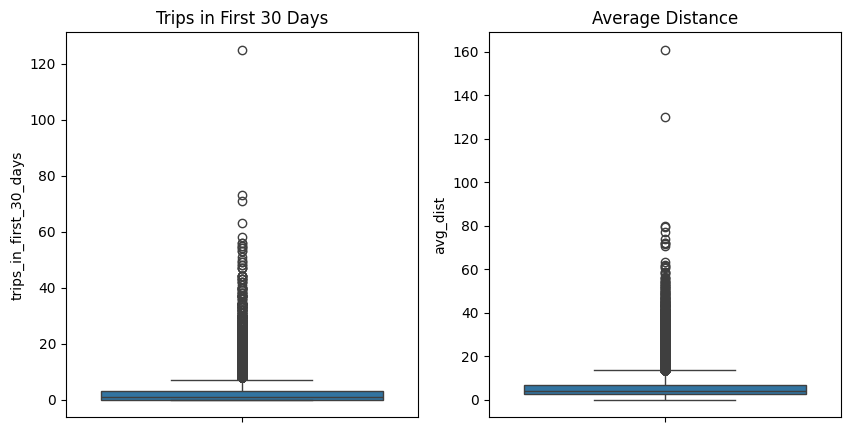

In [16]:
# Box plots for trips_first30 & avg_dist
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['trips_in_first_30_days'], ax=ax[0])
sns.boxplot(df['avg_dist'], ax=ax[1])
ax[0].set_title('Trips in First 30 Days')
ax[1].set_title('Average Distance')
plt.show()

It seems these outliers significantly exceed any other value and are probably the result of data error. We'll drop these

In [17]:
# Remove outliers
df = df[(df['trips_in_first_30_days'] < 80) & (df['avg_dist'] < 80)]

Now we'll check the box plot again

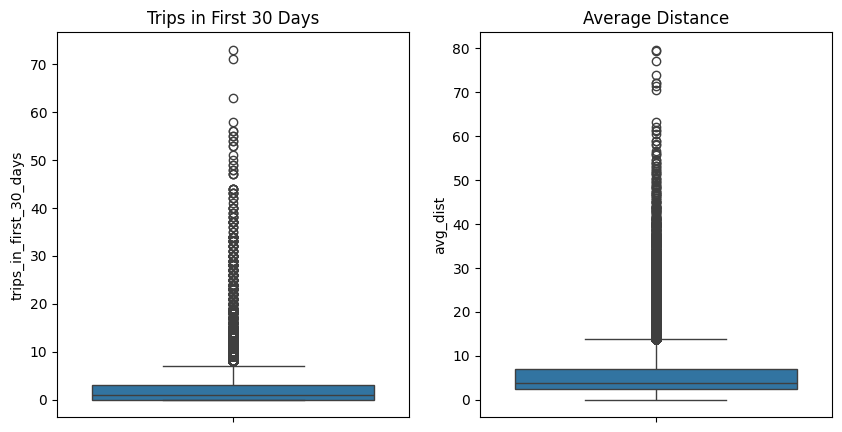

In [18]:
# Box plot
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(df['trips_in_first_30_days'], ax=ax[0])
sns.boxplot(df['avg_dist'], ax=ax[1])
ax[0].set_title('Trips in First 30 Days')
ax[1].set_title('Average Distance')
plt.show()

While there are still some extreme outliers in this set, it doesn't appear to be error as much. We'll take care of the outliers in preprocessing.

## EDA
What fraction of observed users were retained? Consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days

To start, we'll create a column for active users who took a trip in last 30 days

In [19]:
# Get most recent date
max_date = df['last_trip_date'].max()

# Create active user column
df['active_user'] = np.where(df['last_trip_date'] >= (max_date - dt.timedelta(days=30)), 1, 0)

In [20]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Now that this is set, we can look at how many users were retained

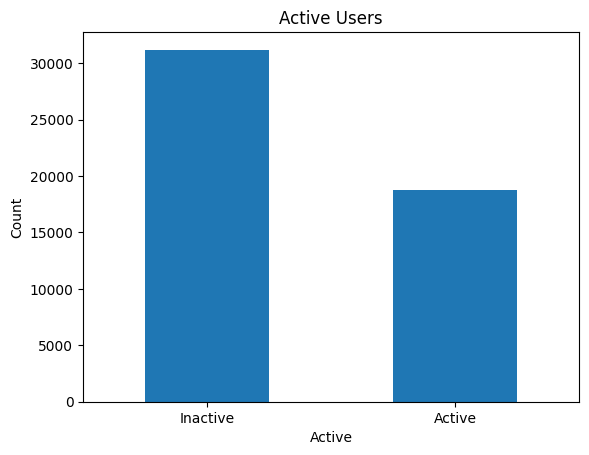

In [21]:
# Bar chart for retained users
df['active_user'].value_counts().plot(kind='bar')
plt.title('Active Users')
plt.xlabel('Active')
plt.xticks([0, 1], ['Inactive', 'Active'], rotation=0)
plt.ylabel('Count')
plt.show()

Looks like Inactive users account for a much larger share than active users. We'll analyze this in a pie chart as the goal is to view this is a fraction

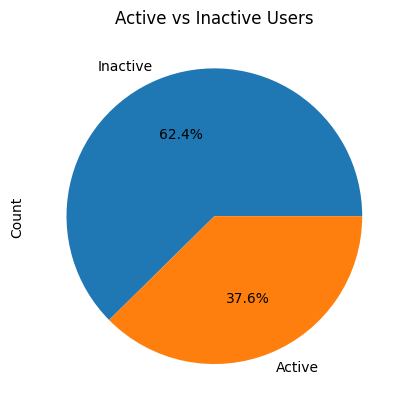

In [22]:
# Pie chart for active users
df['active_user'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Inactive', 'Active'])
plt.title('Active vs Inactive Users')
plt.ylabel('Count')
plt.show()

We retain less than 38% of users from this data. 62.4% of our users who signed up in Jan 2014 are now inactive

In [23]:
# Get value counts
df['active_user'].value_counts()

,count
active_user,
0,31187
1,18802


Let's look at what correlates to active/inactive users

First I'll separate the numeric columns so we can see the numeric correlations

In [24]:
# Numeric column
num_cols = df.select_dtypes(include=['float64', 'int64'])
num_cols.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0


In [25]:
# Correlation to active/inactive
num_cols.corr()['active_user']

,active_user
trips_in_first_30_days,0.211846
avg_rating_of_driver,-0.010793
avg_surge,-0.003377
surge_pct,0.011740
weekday_pct,0.009557
avg_dist,-0.094347
avg_rating_by_driver,-0.026683
active_user,1.000000


Trips in the
 first 30 days has the highest correlation but no other results have a very strong positive or negative correlation

/tmp/ipython-input-504773604.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1 = df.groupby('trips_first_30_binned')['active_user']\
/tmp/ipython-input-504773604.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2 = df.groupby('trips_first_30_binned')['active_user']\


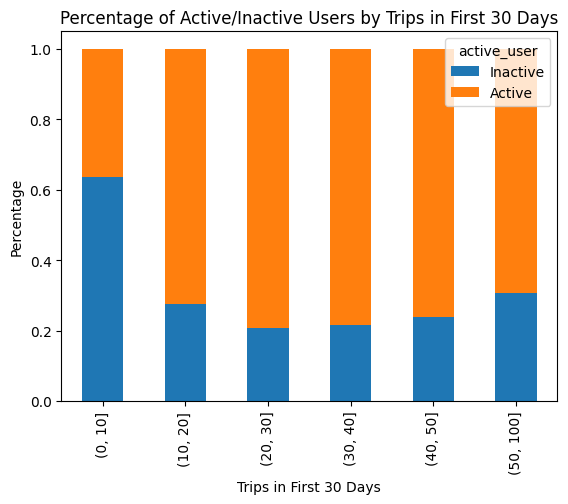

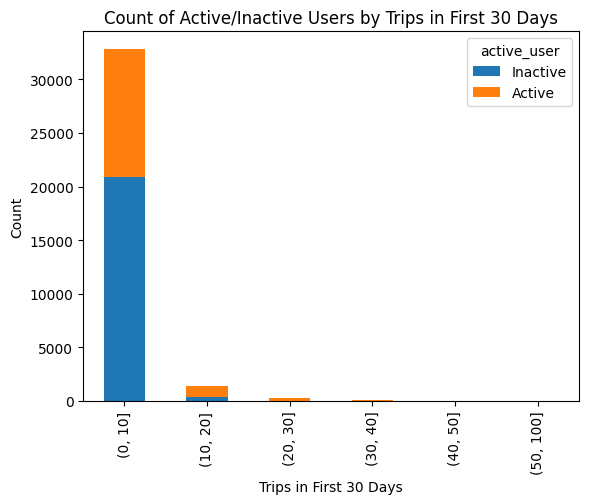

In [26]:
# Create bins for bar plot
bins = [0, 10, 20, 30, 40, 50, 100]
df['trips_first_30_binned'] = pd.cut(df['trips_in_first_30_days'], bins)

# View trips in first 30 days vs active user in bar plot
ax1 = df.groupby('trips_first_30_binned')['active_user']\
                .value_counts(normalize=True)\
                .unstack()\
                .plot(kind='bar', stacked=True)
ax1.set_xlabel('Trips in First 30 Days')
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of Active/Inactive Users by Trips in First 30 Days')

ax2 = df.groupby('trips_first_30_binned')['active_user']\
                .value_counts()\
                .unstack()\
                .plot(kind='bar', stacked=True)
ax2.set_xlabel('Trips in First 30 Days')
ax2.set_ylabel('Count')
ax2.set_title('Count of Active/Inactive Users by Trips in First 30 Days')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Inactive', 'Active'], title='active_user')
ax2.legend(handles, ['Inactive', 'Active'], title='active_user')

In [27]:
# Drop binned column
df = df.drop('trips_first_30_binned', axis=1)

We can see that as the number of trips gets above 10, a much larger share of users are active. However a majority of the study have taken 10 or less trips.

Now we can check correlation with any categorical variables. First we'll look at it by city

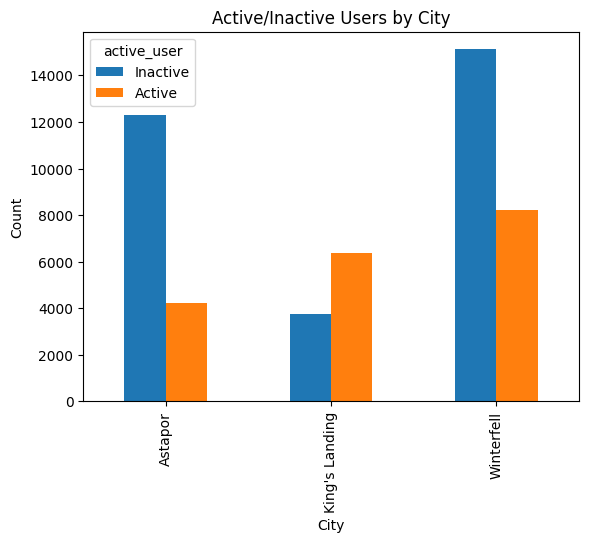

In [28]:
# City vs Active/inactive
ax = df.groupby('city')['active_user']\
                .value_counts()\
                .unstack()\
                .plot(kind='bar')
ax.set_title('Active/Inactive Users by City')
ax.set_xlabel('City')
ax.set_ylabel('Count')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Inactive', 'Active'], title='active_user')
plt.show()

King's landing is the only city with more active than inactive users. This could be an area to focus on as it has the least amount of signups in total. Both Winterfell and Astapor heavily lean towrad inactive users

Next, we'll look at it by phone type

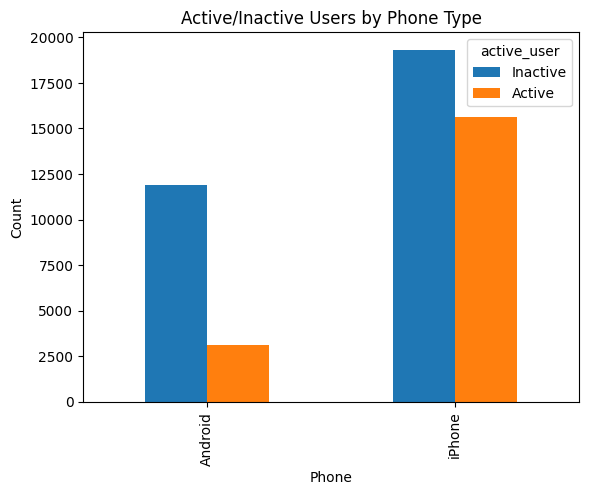

In [29]:
# Phone type by active user
ax = df.groupby('phone')['active_user']\
                .value_counts()\
                .unstack()\
                .plot(kind='bar')
ax.set_title('Active/Inactive Users by Phone Type')
ax.set_xlabel('Phone')
ax.set_ylabel('Count')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Inactive', 'Active'], title='active_user')
plt.show()

We can see that iPhone users are far more likely to remain active users than Android users.

Last, we'll see how it compares with Ultimate black users or not

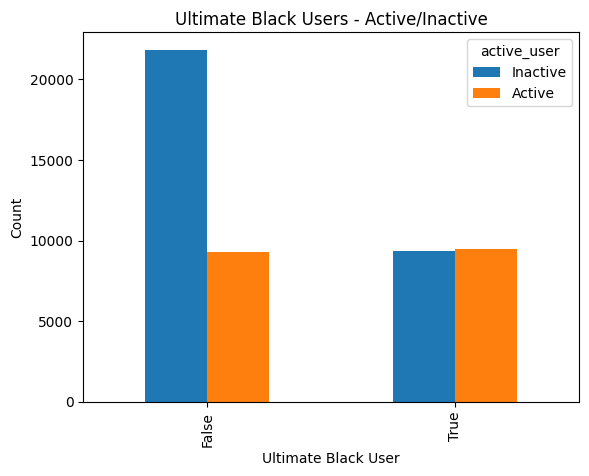

In [30]:
# Active user by ultimate black user standing
ax = df.groupby('ultimate_black_user')['active_user']\
                .value_counts()\
                .unstack()\
                .plot(kind='bar')
ax.set_title('Ultimate Black Users - Active/Inactive')
ax.set_xlabel('Ultimate Black User')
ax.set_ylabel('Count')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Inactive', 'Active'], title='active_user')
plt.show()

We can see that Ultimate Black users are more likely to be active. There are a larger number of users that aren't Ultimate Black subscribers but most of them are inactive.

In total, users in Kings Landing, iPhone users, and Ultimate Black subscribers correlate most positively with retention. No other categories have much of a strong correlation.

## Predictive Modeling
Will a user be active in their 6th month on the system?

###Encode Categorical Data

Before modeling, we'll preprocess our categorical variables by using one hot encoding. First we'll create a function for ease of use.

In [31]:
# OHE function
def ohe(column):
  """Function to encode categorical columns"""
  df_ohe = pd.get_dummies(df[column], dtype=int)
  encode_df = pd.concat([df, df_ohe], axis=1)
  encode_df = encode_df.drop(column, axis=1)
  return encode_df

In [32]:
# Encode city column
df = ohe('city')

In [33]:
# Encode phone column
df = ohe('phone')

In [34]:
# Encode boolean Ultimate black user column
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


Now all categories are numeric except for our date columns. We can drop these as we are just looking at January signups so signup date should have minimal effect. The last trip date we already have as binary for active users (last 30 days).

In [35]:
# drop signup_date & last_trip_date
df = df.drop(['signup_date', 'last_trip_date'], axis=1)

### Split to train/test

We'll split into our training/test sets before scaling the numeric columns to prevent data leakage

In [36]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split X & y variables
X = df.drop('active_user', axis=1)
y = df['active_user']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

Now we'll scale the numeric variables. Since most categories are pretty controlled already, we'll scale trips in the first 30 days and average distance as they seemed to have the most variability in results

Given the extreme outliers in these columns, we'll use RobustScaler. This will prevent our data from being skewed toward the extreme outliers.

In [37]:
import sklearn
from sklearn.preprocessing import RobustScaler

# Instantiate RobustScaler
scaler = RobustScaler()

First we'll scale the training data, next we'll train the test set

In [38]:
# Scale training data
X_train[['trips_in_first_30_days', 'avg_dist']] = scaler.fit_transform(X_train[['trips_in_first_30_days', 'avg_dist']])

In [39]:
# Scale test data
X_test[['trips_in_first_30_days', 'avg_dist']] = scaler.transform(X_test[['trips_in_first_30_days', 'avg_dist']])

# Modeling

For this classification problem, we'll use Logistic regression and Random forest models.

Logistic regression will be good to understand the relationships between variables and likelihood of a user being retained

Random Forest will provie feature importance to see which features are significant predictors of retention and evaluate the likelihood of the user being retained.

### Logistic Regression

In [40]:
# Import and instantiate Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fit & predict on train/test data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we'll analyze how the model performed. I'll create functions for evaluating accuracy scores

In [41]:
# import accuracy scores
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define function
def accuracy_scores(model, X_train, X_test, y_train, y_test, y_pred):
  """Function to print accuracy scores"""
  print('Train Accuracy Score: ', accuracy_score(y_train, model.predict(X_train)))
  print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
  print('\n')
  print('Classification Report')
  print(classification_report(y_test, y_pred))
  print('\n')
  print('Confusion Matrix')
  print(confusion_matrix(y_test, y_pred))

In [42]:
# Analyze accuracy for lr model
accuracy_scores(lr, X_train, X_test, y_train, y_test, y_pred)

Train Accuracy Score:  0.7180615638518667
Test Accuracy Score:  0.7133426685337068


Classification Report
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      6198
           1       0.67      0.49      0.57      3800

    accuracy                           0.71      9998
   macro avg       0.70      0.67      0.68      9998
weighted avg       0.71      0.71      0.70      9998



Confusion Matrix
[[5253  945]
 [1921 1879]]


To start, the model isn't overfitting to either the train or test set since the accuracy scores are so close.

In our classification report, we do see some things for concern. We are only correctly identifying 49% of actual active users. Meaning with active users there is basically a 50/50 shot we are correct. When predicting whether or not a user will be active in their 6th month, we should see better accuracy.

### Parameter Tuning

Since the recall score is so low, we will test out the best parameters.

In [43]:
from sklearn.model_selection import GridSearchCV

# Create parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'max_iter': [1000, 2000],
              'solver': ['saga']}

# Test params
grid_search = GridSearchCV(lr, param_grid, cv=3)
lr_grid = grid_search.fit(X_train, y_train)

# Results
print('Best hyperparameters are: '+str(lr_grid.best_params_))
print('Best score is: '+str(lr_grid.best_score_))

Best hyperparameters are: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}
Best score is: 0.7190117216499384


The accuracy score is still pretty low so we may have to over or undersample our data

Now we'll run our model with the best hyperparameters to see if it will improve recall/precision.

In [44]:
# Instantiate LR model with parameters
lr2 = LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='saga')
lr2.fit(X_train, y_train)
y_pred2 = lr2.predict(X_test)

In [45]:
# Evaluate accuracy scores
accuracy_scores(lr2, X_train, X_test, y_train, y_test, y_pred2)

Train Accuracy Score:  0.7189617663974395
Test Accuracy Score:  0.71374274854971


Classification Report
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      6198
           1       0.67      0.48      0.56      3800

    accuracy                           0.71      9998
   macro avg       0.70      0.67      0.68      9998
weighted avg       0.71      0.71      0.70      9998



Confusion Matrix
[[5293  905]
 [1957 1843]]


The recall score got even worse and most other scores stayed around the same. We'll try to add a parameter to balance our classes and see if that will help.

In [46]:
# Instantiate model with class balance
lr3 = LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='saga', class_weight='balanced')
lr3.fit(X_train, y_train)
y_pred3 = lr3.predict(X_test)

In [47]:
# Evaluate model
accuracy_scores(lr3, X_train, X_test, y_train, y_test, y_pred3)

Train Accuracy Score:  0.7035332949913731
Test Accuracy Score:  0.6965393078615724


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      6198
           1       0.59      0.66      0.62      3800

    accuracy                           0.70      9998
   macro avg       0.68      0.69      0.68      9998
weighted avg       0.70      0.70      0.70      9998



Confusion Matrix
[[4454 1744]
 [1290 2510]]


This improved the recall for active users but also led to an increase in false positives (lower precision). We'll try another model

### Random Forest

Now we'll test out a Random Forest model to see if we can improve our accuracy and recall.

In [48]:
# Import & instantiate random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

In [49]:
# Evaluate model
accuracy_scores(rf, X_train, X_test, y_train, y_test, y_pred4)

Train Accuracy Score:  0.9967742742116976
Test Accuracy Score:  0.7584516903380676


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6198
           1       0.69      0.66      0.67      3800

    accuracy                           0.76      9998
   macro avg       0.74      0.74      0.74      9998
weighted avg       0.76      0.76      0.76      9998



Confusion Matrix
[[5079 1119]
 [1296 2504]]


The accuracy on our training data is nearly perfect, showing strong evidence of overfitting. Our precision and recall for active users improved but is still far lower than desired.

We'll us GridSearchCV to try to tune the hyperparameters again.

In [50]:
# Test hyperparameters
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_leaf': [5, 10, 15],
              'max_features': ['auto', 'sqrt', 'log2']}

# Test params
grid_search = GridSearchCV(rf, param_grid, cv=3)
rf_grid = grid_search.fit(X_train, y_train)

# Results
print('Best hyperparameters are: '+str(rf_grid.best_params_))
print('Best score is: '+str(rf_grid.best_score_))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best hyperparameters are: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}
Best score is: 0.7849264675331686


Now we'll evaluate the model with the optimal parameters

In [51]:
# Instantiate & fit on best hyperparams
rf2 = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=15, n_estimators=200)
rf2.fit(X_train, y_train)
y_pred5 = rf2.predict(X_test)

In [52]:
# Evaluate model
accuracy_scores(rf2, X_train, X_test, y_train, y_test, y_pred5)

Train Accuracy Score:  0.808106824035408
Test Accuracy Score:  0.7863572714542909


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      6198
           1       0.76      0.65      0.70      3800

    accuracy                           0.79      9998
   macro avg       0.78      0.76      0.77      9998
weighted avg       0.78      0.79      0.78      9998



Confusion Matrix
[[5401  797]
 [1339 2461]]


This is much improved from the last one in terms of overfitting. The train/test scores are both around 80%. Precision on our active users increased but recall decreased.

We'll try to balance the classes to see if this will improve the scores

In [53]:
# Instantiate with params & class balance
rf3 = RandomForestClassifier(max_depth=15,
                             max_features='sqrt',
                             min_samples_leaf=15,
                             n_estimators=200,
                             class_weight='balanced')
rf3.fit(X_train, y_train)
y_pred6 = rf3.predict(X_test)

In [54]:
# Evaluate model
accuracy_scores(rf3, X_train, X_test, y_train, y_test, y_pred6)

Train Accuracy Score:  0.8017553949638668
Test Accuracy Score:  0.7799559911982397


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6198
           1       0.70      0.75      0.72      3800

    accuracy                           0.78      9998
   macro avg       0.77      0.77      0.77      9998
weighted avg       0.78      0.78      0.78      9998



Confusion Matrix
[[4960 1238]
 [ 962 2838]]


The recall score improved but it is still only at 75% meaning about 25% of our active users aren't being caught by the model.

We may have to try oversampling our data to improve this score.

## Oversample data

In [55]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
#Import Counter
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample
X_res, y_res = smote.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_res)}")

Original dataset shape: Counter({0: 31187, 1: 18802})
Resampled dataset shape: Counter({1: 31187, 0: 31187})


We'll split this into train/test sets and test on our models

In [56]:
# Split to train/test
X_train_smote, X_test, y_train_smote, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Now that we have oversampled our training set, we can test this on both of the best logistic regression and random forest models

In [57]:
# Fit to lr
lr.fit(X_train_smote, y_train_smote)
y_pred7 = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Evaluate model
accuracy_scores(lr, X_train_smote, X_test, y_train_smote, y_test, y_pred7)

Train Accuracy Score:  0.6987514779855307
Test Accuracy Score:  0.7000400801603206


Classification Report
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      6177
           1       0.72      0.66      0.69      6298

    accuracy                           0.70     12475
   macro avg       0.70      0.70      0.70     12475
weighted avg       0.70      0.70      0.70     12475



Confusion Matrix
[[4561 1616]
 [2126 4172]]


In [59]:
# Fit to lr2
lr2.fit(X_train_smote, y_train_smote)
y_pred8 = lr2.predict(X_test)

In [60]:
# Evaluate model
accuracy_scores(lr2, X_train_smote, X_test, y_train_smote, y_test, y_pred8)

Train Accuracy Score:  0.7115773863203672
Test Accuracy Score:  0.7094188376753507


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6177
           1       0.73      0.67      0.70      6298

    accuracy                           0.71     12475
   macro avg       0.71      0.71      0.71     12475
weighted avg       0.71      0.71      0.71     12475



Confusion Matrix
[[4630 1547]
 [2078 4220]]


In [61]:
# Fit to lr3
lr3.fit(X_train_smote, y_train_smote)
y_pred7 = lr3.predict(X_test)

In [62]:
# Evaluate results
accuracy_scores(lr3, X_train_smote, X_test, y_train_smote, y_test, y_pred7)

Train Accuracy Score:  0.711236698130223
Test Accuracy Score:  0.7092585170340682


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6177
           1       0.73      0.67      0.70      6298

    accuracy                           0.71     12475
   macro avg       0.71      0.71      0.71     12475
weighted avg       0.71      0.71      0.71     12475



Confusion Matrix
[[4617 1560]
 [2067 4231]]


None of our logistic regression models performed particularly well with the resampled data. All still had low accuracy scores around 70% and low recall scores at 66-67%.

We'll try the random forest models to see if we can get better performance.

In [63]:
# Fit to rf
rf.fit(X_train_smote, y_train_smote)
y_pred8 = rf.predict(X_test)

In [64]:
# Evaluate model
accuracy_scores(rf, X_train_smote, X_test, y_train_smote, y_test, y_pred8)

Train Accuracy Score:  0.99735465640594
Test Accuracy Score:  0.8002404809619238


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      6177
           1       0.80      0.81      0.80      6298

    accuracy                           0.80     12475
   macro avg       0.80      0.80      0.80     12475
weighted avg       0.80      0.80      0.80     12475



Confusion Matrix
[[4891 1286]
 [1206 5092]]


In [65]:
# Fit to rf2
rf2.fit(X_train_smote, y_train_smote)
y_pred9 = rf2.predict(X_test)

In [66]:
# Evaluate model
accuracy_scores(rf2, X_train_smote, X_test, y_train_smote, y_test, y_pred9)

Train Accuracy Score:  0.8204172428305176
Test Accuracy Score:  0.8048897795591182


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      6177
           1       0.82      0.79      0.80      6298

    accuracy                           0.80     12475
   macro avg       0.81      0.81      0.80     12475
weighted avg       0.81      0.80      0.80     12475



Confusion Matrix
[[5095 1082]
 [1352 4946]]


In [67]:
# Fit to rf3
rf3.fit(X_train_smote, y_train_smote)
y_pred10 = rf3.predict(X_test)

In [68]:
# Evaluate results
accuracy_scores(rf3, X_train_smote, X_test, y_train_smote, y_test, y_pred10)

Train Accuracy Score:  0.8203771618669713
Test Accuracy Score:  0.8052104208416834


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      6177
           1       0.82      0.79      0.80      6298

    accuracy                           0.81     12475
   macro avg       0.81      0.81      0.81     12475
weighted avg       0.81      0.81      0.81     12475



Confusion Matrix
[[5094 1083]
 [1347 4951]]


Here we can see much improved results and recall scores closer to 80%. While we could get higher scores in accuracy and precision/recall for active users, it may result in overfitting.

# Conclusion

In conclusion, model rf3 will be the best for predicting user retention over 6 months because of the balance it provides both with accuracy and fitting our data correctly.

Ultimate can use this to predict with 80% confidence that a user will be active in 6 months. We can also use the findings from exploring the data to improve our efforts. We saw that user's in Kings Landing had a much higher rate of active users after 6 months and iPhone users were much more likely to be active. Ultimate can focus efforts into marketing to these demographics and pushing users with > 10 rides in the first month to become Ultimate black users.